In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap = "gray"):
    fig = plt.figure(figsize =(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap ="gray")

In [5]:
sep_coin = cv2.imread(r"D:/STUDY/OPENCV/drive-download-20240131T012424Z-001/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/pennies.jpg")

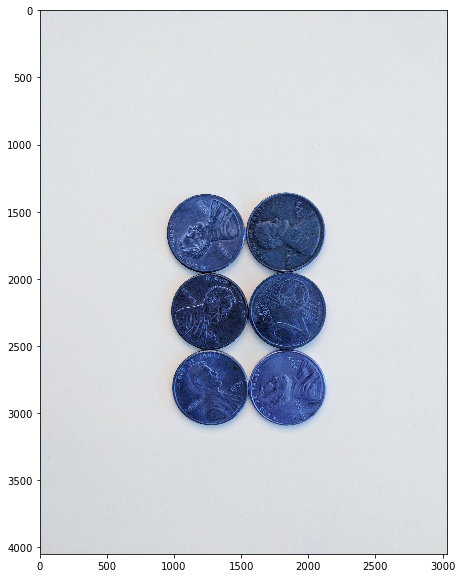

In [8]:
display(sep_coin)

In [9]:
sep_blur = cv2.medianBlur(sep_coin, 25)

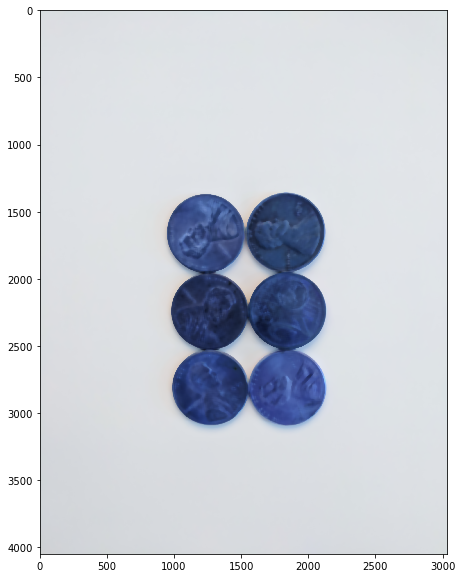

In [10]:
display(sep_blur)

In [11]:
gray_coin = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

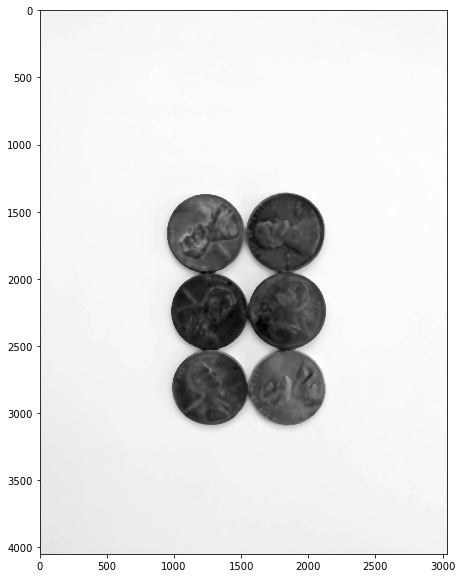

In [12]:
display(gray_coin)

In [25]:
ret, thresh = cv2.threshold(gray_coin, 160, 255, cv2.THRESH_BINARY_INV) 

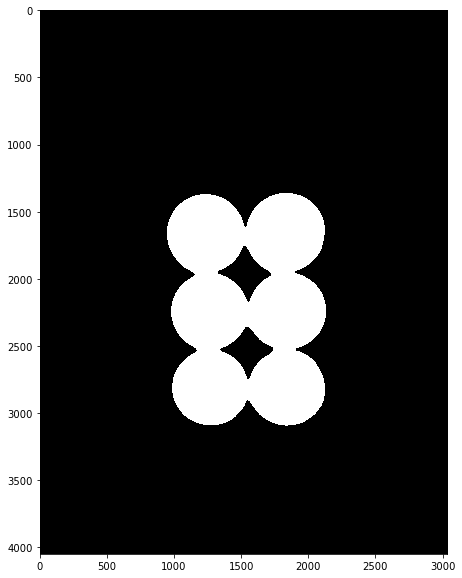

In [26]:
display(thresh, cmap="gray")

In [27]:
ret

160.0

In [29]:
image, contour, heirarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [30]:
image 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [31]:
contour

[array([[[1816, 1360]],
 
        [[1815, 1361]],
 
        [[1805, 1361]],
 
        ...,
 
        [[1857, 1361]],
 
        [[1847, 1361]],
 
        [[1846, 1360]]], dtype=int32),
 array([[[1537, 2355]],
 
        [[1538, 2354]],
 
        [[1542, 2354]],
 
        ...,
 
        [[1533, 2356]],
 
        [[1534, 2356]],
 
        [[1535, 2355]]], dtype=int32),
 array([[[1515, 1756]],
 
        [[1526, 1756]],
 
        [[1528, 1758]],
 
        ...,
 
        [[1509, 1763]],
 
        [[1510, 1762]],
 
        [[1510, 1761]]], dtype=int32)]

In [32]:
heirarchy

array([[[-1, -1,  1, -1],
        [ 2, -1, -1,  0],
        [-1,  1, -1,  0]]], dtype=int32)

In [35]:
for i in range(len(heirarchy)):
    if heirarchy[0][i][3] ==-1:
        cv2.drawContours(sep_coin, contour, i, (255,0,0), 10)

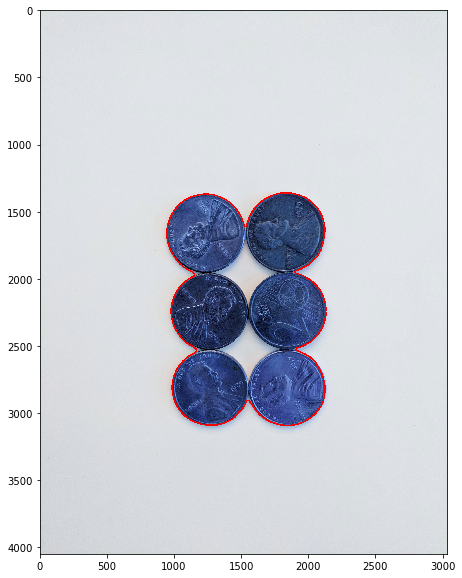

In [36]:
display(sep_coin)

In [37]:
 sep_coin = cv2.imread(r"D:/STUDY/OPENCV/drive-download-20240131T012424Z-001/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/pennies.jpg")

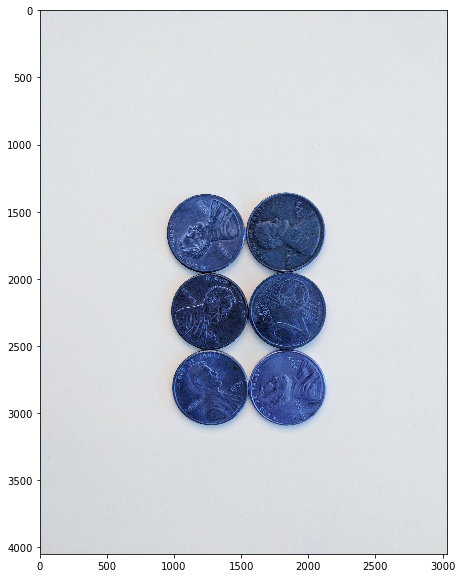

In [38]:
display(sep_coin)

In [78]:
blur_coin = cv2.medianBlur(sep_coin, ksize = 35)

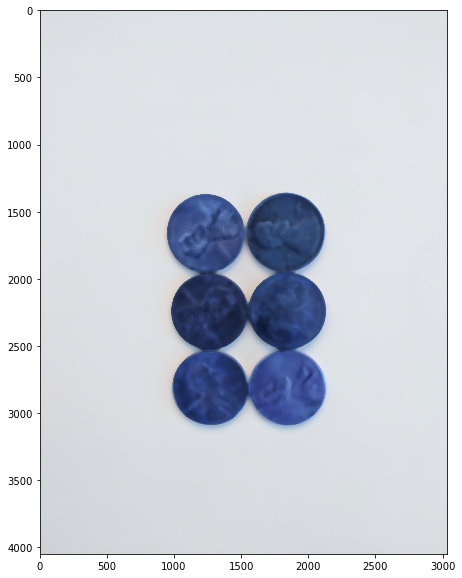

In [79]:
display(blur_coin)

In [80]:
gray_coin = cv2.cvtColor(blur_coin, cv2.COLOR_BGR2GRAY)

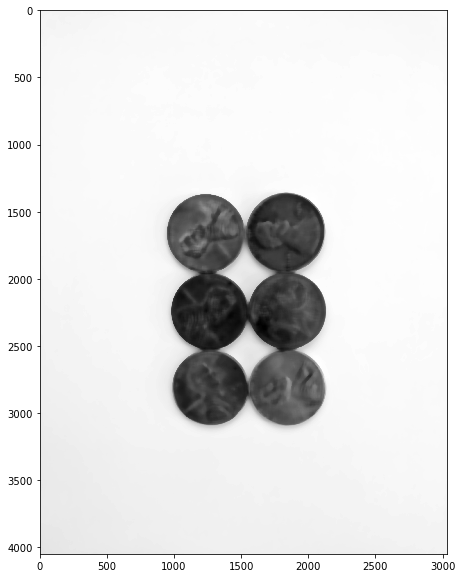

In [81]:
display(gray_coin)

In [82]:
ret, thresh = cv2.threshold(gray_coin, 127, 255, cv2.THRESH_BINARY_INV)

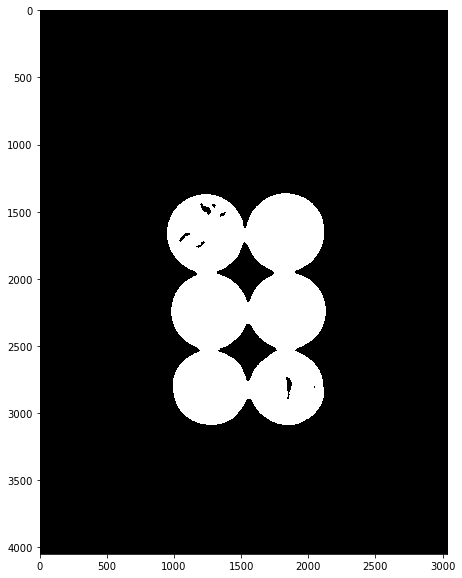

In [83]:
display(thresh)

In [84]:
kernel = np.ones((3,3), np.uint8)
noise_removed = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, 1800)

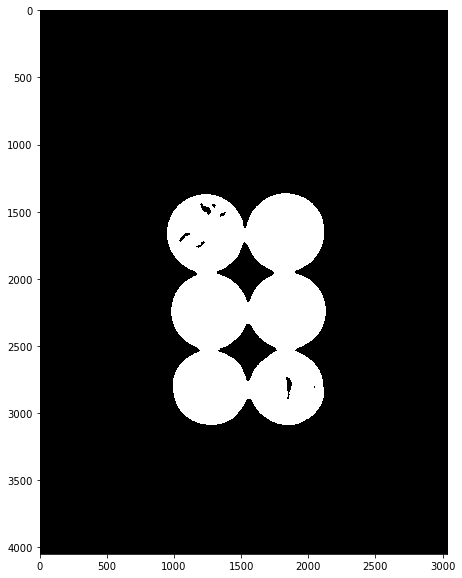

In [85]:
display(noise_removed)

In [86]:
ret, thresh = cv2.threshold(gray_coin, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

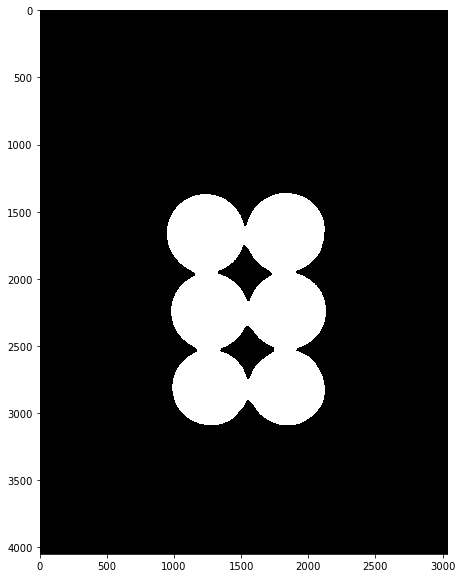

In [87]:
display(thresh)

In [88]:
sure_bg = cv2.dilate(thresh, kernel, 3)

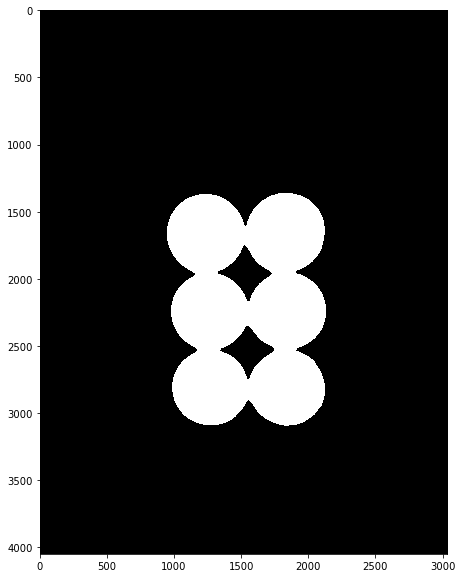

In [89]:
display(sure_bg)

In [90]:
sure_fg = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)

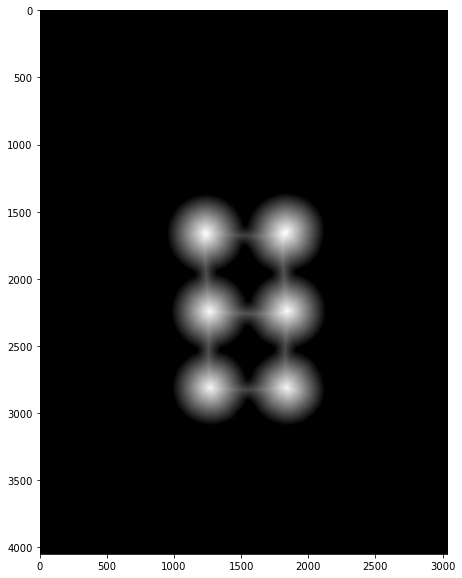

In [91]:
display(sure_fg)

In [92]:
ret, sure_fg = cv2.threshold(sure_fg, 0.7*sure_fg.max(), 255, 0)

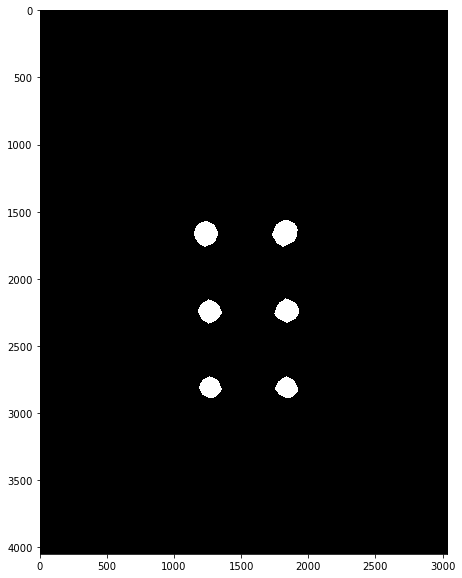

In [93]:
display(sure_fg)

In [96]:
ambigous = sure_bg- sure_fg

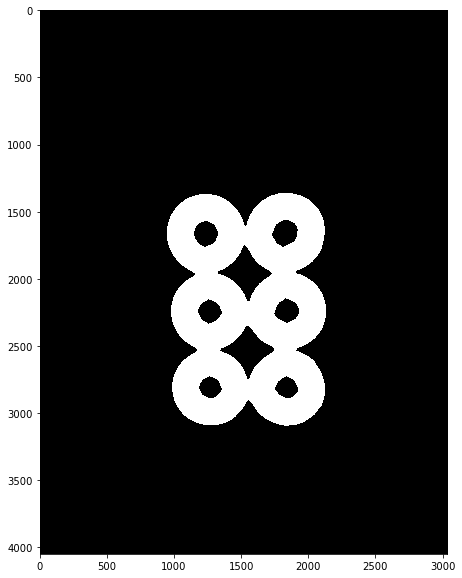

In [97]:
display(ambigous)

In [111]:
ret, markers = cv2.connectedComponents(np.uint8(sure_fg))
markers = markers+1
markers[ambigous ==255] =0

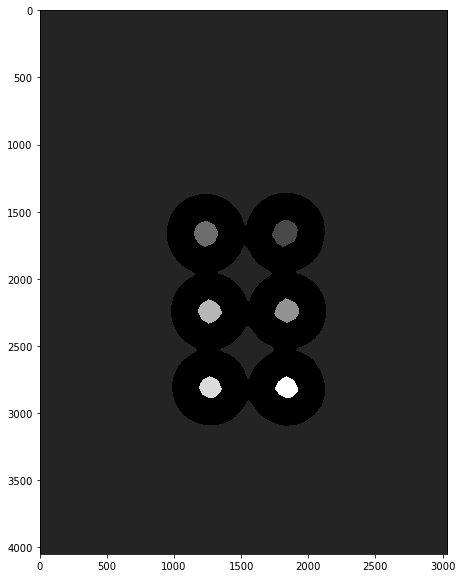

In [112]:
display(markers)

In [113]:
markers = cv2.watershed(sep_coin, markers)

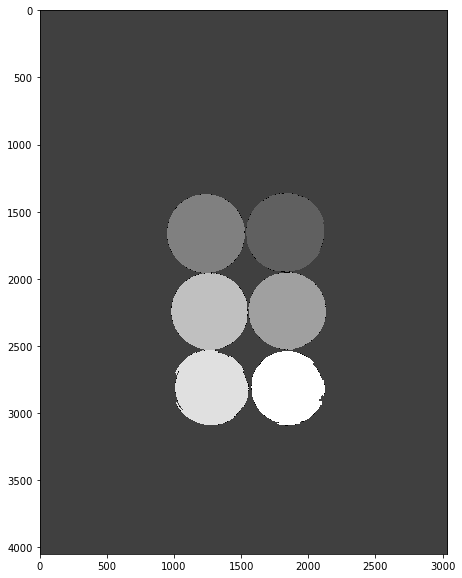

In [114]:
display(markers)

In [119]:
image, contours, hierarchy = cv2.findContours(markers, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if  hierarchy[0][i][3] ==-1:
        cv2.drawContours(sep_coin, contours, i, (255,0,0), 10)

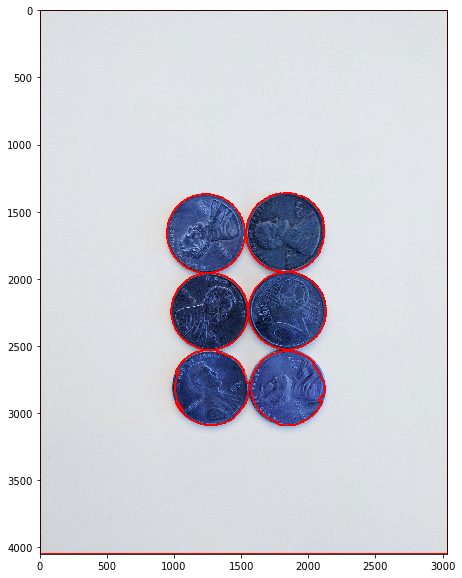

In [120]:
display(sep_coin)

In [1]:
#####Custom SEEDS


In [3]:
road = cv2.imread(r"D:/STUDY/OPENCV/drive-download-20240131T012424Z-001/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/road_image.jpg")

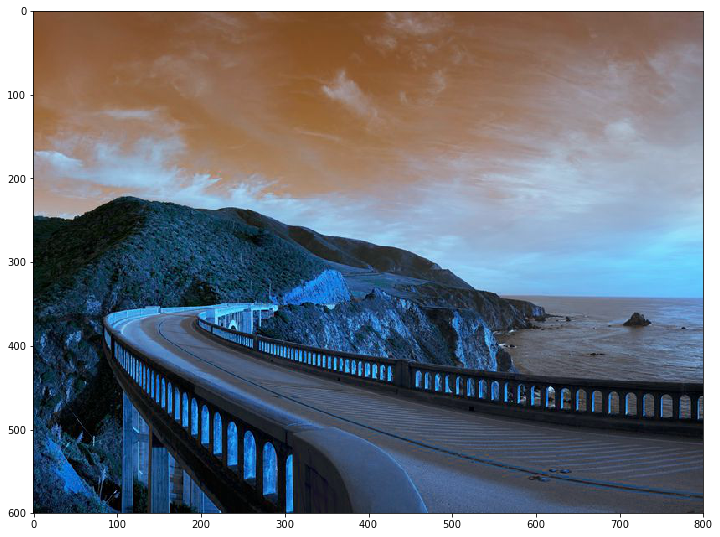

In [4]:
display(road)

In [5]:
road_copy = road.copy()

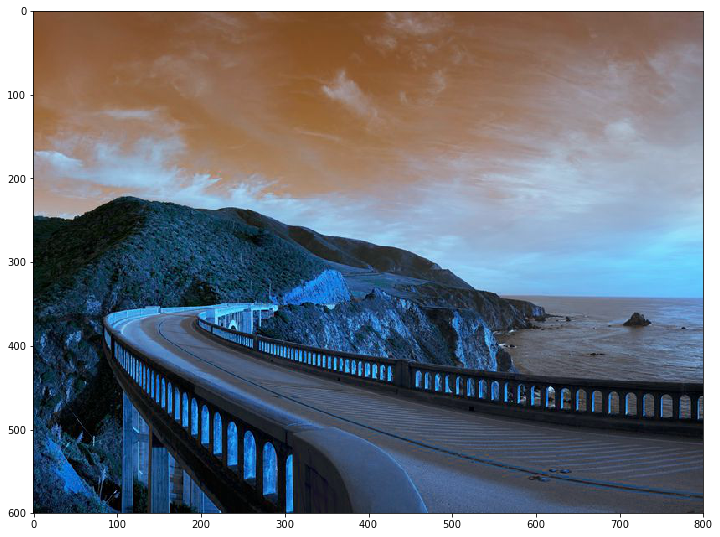

In [6]:
display(road_copy)

In [7]:
markers = np.zeros(road.shape[:2], dtype = np.int32)

In [8]:
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
markers.shape

(600, 800)

In [10]:
segments = np.zeros(road.shape, np.uint8)

In [11]:
segments

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [12]:
from matplotlib import cm

In [13]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [14]:
x= np.array(cm.tab10(0))[:3]*255

In [15]:
x

array([ 31., 119., 180.])

In [16]:
x.astype(int)

array([ 31, 119, 180])

In [17]:
tuple(x.astype(int))

(31, 119, 180)

In [18]:
def create_rgb(i):
    x = np.array(cm.tab10(i))[:3]*255
    return tuple(x)

In [19]:
colors = []

In [20]:
for i in range(10):
    colors.append(create_rgb(i))

In [21]:
colors 

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [22]:
len(colors)

10

In [23]:
current_marker = 1
n_markers = 10
marks_updated = False
def mouse_callback(event, x, y, flags, param):
    global marks_updated
    if event ==cv2.EVENT_LBUTTONDOWN:
        cv2.circle(markers, (x,y), 10,(current_marker), -1)
        cv2.circle(road_copy, (x,y),10, colors[current_marker], -1)
        marks_updated = True
        
        

In [24]:
cv2.namedWindow("Road Image")
cv2.setMouseCallback("Road Image", mouse_callback)
while True:
    cv2.imshow("Watershed Segments", segments)
    cv2.imshow("Road Image", road_copy)
    k = cv2.waitKey(1)
    if k==27:
        break
    elif k ==ord("c"):
        road_copy = road.copy()
        markers = np.zeros(road.shape[:2], np.uint32)
        segments = np.zeros(road.shape, np.uint8)
    elif k>0 and chr(k).isdigit():
        current_marker = int(chr(k))
    if marks_updated:
        marker_copy = markers.copy()
        cv2.watershed(road, marker_copy)
        segments = np.zeros(road.shape, np.uint8)
        for color_ind in range(n_markers):
            segments[marker_copy == (color_ind)] = colors[color_ind]
        marks_updated = False
cv2.destroyAllWindows()
        

TypeError: img data type = 8 is not supported

TypeError: img data type = 8 is not supported

In [27]:
markers.dtype

dtype('uint8')

In [31]:
current_marker

1

In [32]:
colors[1]

(255.0, 127.0, 14.0)

In [3]:
nadia = cv2.imread(r"D:/STUDY/OPENCV/drive-download-20240131T012424Z-001/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/Nadia_Murad.jpg")
denis = cv2.imread(r"D:/STUDY/OPENCV/drive-download-20240131T012424Z-001/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/Denis_Mukwege.jpg")
group = cv2.imread(r"D:/STUDY/OPENCV/drive-download-20240131T012424Z-001/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/solvay_conference.jpg")

In [4]:
face_cascade = cv2.CascadeClassifier(r"D:/STUDY/OPENCV/drive-download-20240131T012424Z-001/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_frontalface_default.xml")

In [5]:
def detect_face(image):
    img_copy = image.copy()
    detect_faces = face_cascade.detectMultiScale(img_copy)
    for (x,y,w,h) in detect_faces:
        cv2.rectangle(img_copy, (x,y), (x+w,y+h), (255,255,255), 10)
    return img_copy
    

In [6]:
nadia_face = detect_face(nadia)

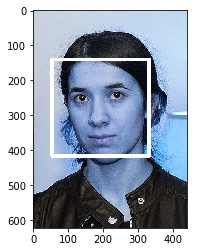

In [7]:
plt.imshow(nadia_face, cmap="gray")

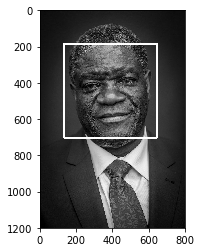

In [8]:
denis_face = detect_face(denis)
plt.imshow(denis_face, cmap="gray")

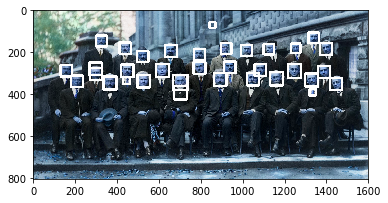

In [9]:
group_face = detect_face(group)
plt.imshow(group_face, cmap="gray")

In [10]:
eyes_cascade = cv2.CascadeClassifier(r"D:/STUDY/OPENCV/drive-download-20240131T012424Z-001/Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_eye.xml")


In [15]:
def  detect_eye(img):
    img_copy = img.copy()
    eye_detect= eyes_cascade.detectMultiScale(img_copy)
    for (x,y,w,h) in eye_detect:
        cv2.rectangle(img_copy, (x,y), (x+w,y+h), (255,255,255), 10)
    return img_copy

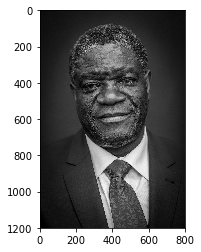

In [16]:
denis_eyes = detect_eye(denis)
plt.imshow(denis_eyes, cmap="gray")

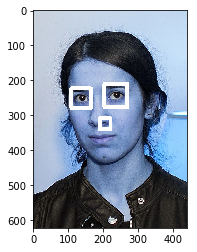

In [17]:
nadia_eyes = detect_eye(nadia)
plt.imshow(nadia_eyes, cmap="gray")